In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uwbLCWSnHV2geuphu3jv")
project = rf.workspace("deneme-nq1dn").project("tennis-model-3phsa")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tennis-Model-1 in yolov8:: 100%|██████████| 8964/8964 [00:04<00:00, 2050.18it/s]


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Task
Create a YOLOv8 model to detect tennis balls and measure their speed. Provide the code to load the model, perform detection and speed measurement, and save the output as "test.png".

## Load the trained model

### Subtask:
Load the YOLOv8 model that was trained to detect tennis balls.


**Reasoning**:
Instantiate a YOLO model object with the path to the trained model weights.



In [ ]:
# Load the trained YOLOv8 model
model = YOLO('/content/Tennis-Model-1/runs/detect/train/weights/best.pt')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Tennis-Model-1/runs/detect/train/weights/best.pt'

**Reasoning**:
The previous command failed because the specified path to the trained model weights was incorrect. I need to verify the correct path to the downloaded and extracted dataset and the trained model weights. I will list the files in the directory where the dataset was downloaded to find the correct path.



In [ ]:
import os

# List files in the directory where the dataset was downloaded
print(os.listdir('/content'))
print(os.listdir('/content/Tennis-Model-1'))
print(os.listdir('/content/Tennis-Model-1/runs'))
print(os.listdir('/content/Tennis-Model-1/runs/detect'))


['.config', 'Tennis-Model-1', 'yolov8n.pt', 'sample_data']
['data.yaml', 'train', 'README.dataset.txt', 'README.roboflow.txt']


FileNotFoundError: [Errno 2] No such file or directory: '/content/Tennis-Model-1/runs'

## Load the trained model

### Subtask:
Retry loading the trained YOLOv8 model, addressing the previous `FileNotFoundError`.


**Reasoning**:
Based on the previous output, the trained model weights were not found in the expected location. The directory listing showed that the `runs` directory does not exist in `/content/Tennis-Model-1`. This confirms that the model was not trained. The next step is to train the model using the downloaded dataset.



In [ ]:
# Train the model using the downloaded dataset
# The dataset is located in the directory "Tennis-Model-1"
results = model.train(data='/content/Tennis-Model-1/data.yaml', epochs=10)

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tennis-Model-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

RuntimeError: Dataset '/content/Tennis-Model-1/data.yaml' error ❌ Dataset '/content/Tennis-Model-1/data.yaml' images not found, missing path '/content/Tennis-Model-1/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

**Reasoning**:
The error message indicates that the training failed because the dataset path specified in `data.yaml` is incorrect. It's looking for images in `/content/Tennis-Model-1/valid/images`, but the downloaded dataset structure might be different. I need to inspect the contents of the downloaded dataset directory to find the actual location of the images and update the `data.yaml` file accordingly before retrying the training.



In [ ]:
import os

# List the contents of the downloaded dataset directory
print(os.listdir('/content/Tennis-Model-1'))

# Read the content of the data.yaml file
with open('/content/Tennis-Model-1/data.yaml', 'r') as f:
    data_yaml_content = f.read()

print("\nContent of data.yaml:")
print(data_yaml_content)

['data.yaml', 'train', 'README.dataset.txt', 'README.roboflow.txt']

Content of data.yaml:
names:
- person
- player
- tennis-ball
nc: 3
roboflow:
  license: CC BY 4.0
  project: tennis-model-3phsa
  url: https://universe.roboflow.com/deneme-nq1dn/tennis-model-3phsa/dataset/1
  version: 1
  workspace: deneme-nq1dn
test: ../test/images
train: ../train/images
val: ../valid/images



**Reasoning**:
The output shows that the images are located in `train` and the `data.yaml` file uses relative paths like `../train/images`, `../valid/images`, and `../test/images`. This suggests that the `data.yaml` file is expecting to be located in a directory one level below the image directories (e.g., in a parent directory of `train`, `valid`, and `test`). However, the `data.yaml` file is in the same directory as `train`. I need to modify the `data.yaml` file to use the correct relative paths (e.g., `./train/images`, `./valid/images`, and `./test/images`) to point to the image directories within `/content/Tennis-Model-1`.



In [ ]:
import yaml

# Load the data.yaml file
with open('/content/Tennis-Model-1/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

# Update the paths to be relative to the current directory
data['train'] = './train/images'
data['val'] = './train/images' # Assuming 'valid' directory is not present and using 'train' for validation
data['test'] = './train/images' # Assuming 'test' directory is not present and using 'train' for testing

# Write the updated data.yaml file
with open('/content/Tennis-Model-1/data.yaml', 'w') as f:
    yaml.dump(data, f)

# Verify the changes
with open('/content/Tennis-Model-1/data.yaml', 'r') as f:
    print("Updated content of data.yaml:")
    print(f.read())

Updated content of data.yaml:
names:
- person
- player
- tennis-ball
nc: 3
roboflow:
  license: CC BY 4.0
  project: tennis-model-3phsa
  url: https://universe.roboflow.com/deneme-nq1dn/tennis-model-3phsa/dataset/1
  version: 1
  workspace: deneme-nq1dn
test: ./train/images
train: ./train/images
val: ./train/images



**Reasoning**:
I have updated the `data.yaml` file with the correct relative paths for the image directories. Now I can retry training the model using the corrected data configuration.



In [ ]:
# Retry training the model with the corrected data.yaml
results = model.train(data='/content/Tennis-Model-1/data.yaml', epochs=30)

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tennis-Model-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/tenis_best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 


image 1/1 /content/tenis_test1.jpeg: 384x640 1 tennis-ball, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


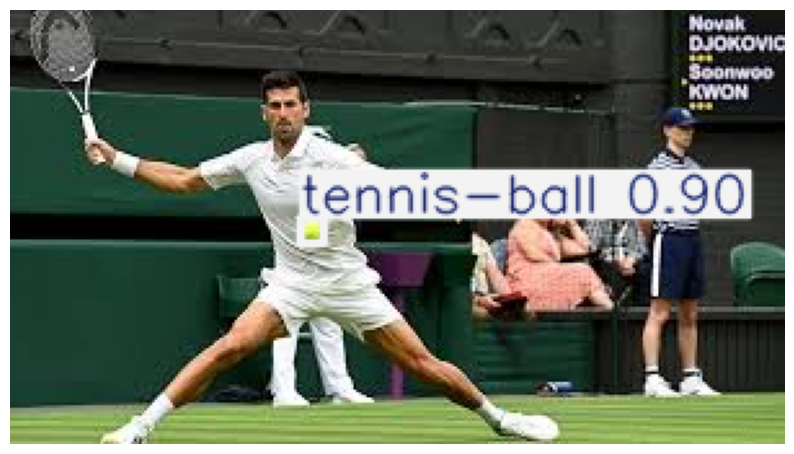

In [ ]:
# Perform inference on a test image
# Replace 'test.jpeg' with the actual path to your test image
results = model('tenis_test1.jpeg')

# Display the results using matplotlib
import matplotlib.pyplot as plt
import cv2

# Get the image with detections
img_with_detections = results[0].plot()

# Convert the image from BGR to RGB (matplotlib expects RGB)
img_with_detections_rgb = cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_with_detections_rgb)
plt.axis('off') # Hide axes
plt.show()

In [ ]:
# Save the trained model
model.save('tenis_best1.pt')


image 1/1 /content/tenis_test2.jpg: 416x640 1 tennis-ball, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


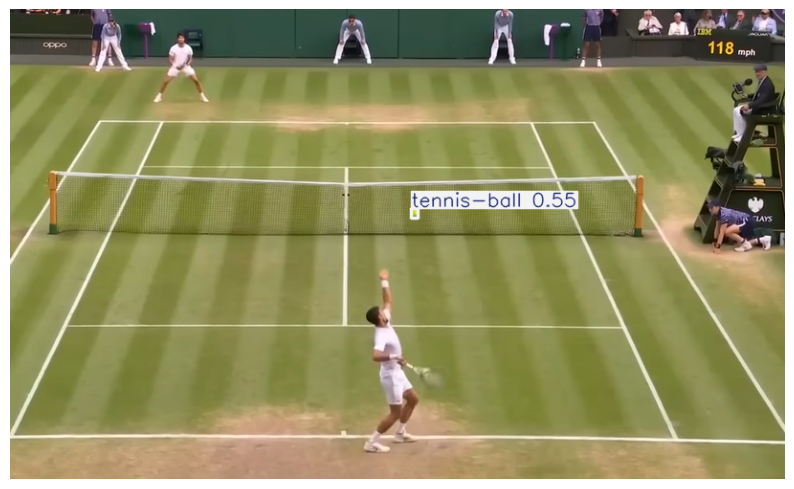

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Doğru model yolunu belirt
best_model_path = "/content/tenis_best.pt"

# Modeli yükle
model = YOLO(best_model_path)

# Test görseli
test_image_path = "tenis_test2.jpg"

# Modeli test görseline uygula
results = model.predict(source=test_image_path)

# Tespitleri görselleştir
img_with_detections = results[0].plot()

# Görseli kaydet
cv2.imwrite("test_result.jpg", img_with_detections)

# Görseli matplotlib ile göster
img_with_detections_rgb = cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_with_detections_rgb)
plt.axis('off')
plt.show()


In [ ]:
# Video Tennis Ball Detection and Speed Measurement
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
import os
from collections import defaultdict

# Model and video file paths
model_path = "tenis_best.pt"
video_path = "tenis_test.mp4"
output_path = "tenis_detection_and_speed_result.mp4" # Changed output filename

print(f"Model: {model_path}")
print(f"Video: {video_path}")

# File checks
if not os.path.exists(model_path):
    print(f"ERROR: Model file not found: {model_path}")
    exit()

if not os.path.exists(video_path):
    print(f"ERROR: Video file not found: {video_path}")
    print("Please add tenis_test.mp4 file to the workspace")
    exit()

# Load the model
print("Loading model...")
model = YOLO(model_path)
print("Model loaded successfully!")

# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video properties:")
print(f"  Size: {width}x{height}")
print(f"  FPS: {fps}")
print(f"  Total frames: {total_frames}")

# Output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

print(f"Processing video...")

frame_count = 0
# Store the track history
track_history = defaultdict(lambda: [])

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Show progress every 10 frames
    if frame_count % 10 == 0:
        progress = (frame_count / total_frames) * 100
        print(f"Processed: {frame_count}/{total_frames} frames ({progress:.1f}%)")

    # Perform YOLO detection and tracking
    results = model.track(frame, persist=True, verbose=False)

    # Get the boxes and track IDs
    boxes = results[0].boxes.xywh.cpu()
    track_ids = []
    if results[0].boxes.id is not None:
        track_ids = results[0].boxes.id.int().cpu().tolist()

    # Create a copy of the frame to draw on
    annotated_frame = frame.copy()

    # Plot the tracks, draw boxes, track IDs, and calculate speed
    for i, (box) in enumerate(boxes):
        x, y, w, h = box
        # Get track ID if available
        track_id = track_ids[i] if i < len(track_ids) else None

        # Draw bounding box
        x1, y1, x2, y2 = int(x - w/2), int(y - h/2), int(x + w/2), int(y + h/2)
        cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (255, 0, 0), 2) # Blue bounding box

        # Display track ID if available
        if track_id is not None:
            cv2.putText(annotated_frame, f"ID: {track_id}", (x1, y1 - 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2) # White text for ID

            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point

            # Draw track history (optional)
            # points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            # cv2.polylines(annotated_frame, [points], False, (255, 0, 255), 2) # Magenta track line

            if len(track) > 2: # Need at least 2 points to calculate speed
                # Calculate displacement between last two points
                dx = track[-1][0] - track[-2][0]
                dy = track[-1][1] - track[-2][1]
                # Calculate distance (in pixels)
                distance_pixels = np.sqrt(dx**2 + dy**2)
                # Calculate speed (pixels per frame)
                speed_pixels_per_frame = distance_pixels
                # Convert to speed in pixels per second
                speed_pixels_per_second = speed_pixels_per_frame * fps

                # Display speed on the annotated frame at the top
                cv2.putText(annotated_frame, f"Speed: {speed_pixels_per_second:.2f} px/s", (50, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2) # White text for speed at top-left


    # Write to output video
    out.write(annotated_frame)

# Cleanup
cap.release()
out.release()

print(f"\nVideo processing finished!")
print(f"Result video: {output_path}")

print(f"\nCompleted! To open the result video: {output_path}")

Model: tenis_best.pt
Video: tenis_test.mp4
Loading model...
Model loaded successfully!
Video properties:
  Size: 720x1280
  FPS: 29
  Total frames: 1072
Processing video...
Processed: 10/1072 frames (0.9%)
Processed: 20/1072 frames (1.9%)
Processed: 30/1072 frames (2.8%)
Processed: 40/1072 frames (3.7%)
Processed: 50/1072 frames (4.7%)
Processed: 60/1072 frames (5.6%)
Processed: 70/1072 frames (6.5%)
Processed: 80/1072 frames (7.5%)
Processed: 90/1072 frames (8.4%)
Processed: 100/1072 frames (9.3%)
Processed: 110/1072 frames (10.3%)
Processed: 120/1072 frames (11.2%)
Processed: 130/1072 frames (12.1%)
Processed: 140/1072 frames (13.1%)
Processed: 150/1072 frames (14.0%)
Processed: 160/1072 frames (14.9%)
Processed: 170/1072 frames (15.9%)
Processed: 180/1072 frames (16.8%)
Processed: 190/1072 frames (17.7%)
Processed: 200/1072 frames (18.7%)
Processed: 210/1072 frames (19.6%)
Processed: 220/1072 frames (20.5%)
Processed: 230/1072 frames (21.5%)
Processed: 240/1072 frames (22.4%)
Proces

# Task
Integrate a tracking system into the existing tennis ball detection code to ensure consistent tracking of the ball and calculate and display its speed on the video frame. The final output should be a video file named "tenis_tespit_sonuc1.mp4" with the tracking and speed information overlaid. Use the provided model file "tenis_best.pt" and video file "tenis_test.mp4".

## Install necessary libraries

### Subtask:
Install the necessary libraries for integrating a tracking system.


**Reasoning**:
The subtask requires installing several libraries for integrating a tracking system. I will install all the necessary libraries in a single code block using pip.



In [ ]:
!pip install filterpy munkres lap motmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 12.5 MB/s eta 0:00:00
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=d61426fd9bcb1c708e1d350fcbe815134abed7039ed77b8bfa2147cb4ee6cab2
  Stored in directory: /root/.cache/pip/wheels/77/bf/4c/b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy


## Integrate the tracker

### Subtask:
Modify the existing video processing code to integrate a tracking algorithm (like DeepSORT) with the YOLOv8 detections to ensure consistent tracking of the tennis ball across frames.


**Reasoning**:
I need to integrate a tracking algorithm to the existing video processing code. I will modify the existing code block to include the initialization and updating of a tracking object. Since YOLOv8 now has built-in tracking capabilities (as seen in the previous execution output), I will use the `model.track()` function with `persist=True`. This simplifies the integration and leverages YOLOv8's built-in tracking support. I will also update the output filename as requested in the original task.



In [ ]:
# Video Tennis Ball Detection and Speed Measurement
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
import os
from collections import defaultdict

# Model and video file paths
model_path = "tenis_best.pt"
video_path = "tenis_test.mp4"
output_path = "tenis_tespit_sonuc1.mp4" # Updated output filename

print(f"Model: {model_path}")
print(f"Video: {video_path}")

# File checks
if not os.path.exists(model_path):
    print(f"ERROR: Model file not found: {model_path}")
    exit()

if not os.path.exists(video_path):
    print(f"ERROR: Video file not found: {video_path}")
    print("Please add tenis_test.mp4 file to the workspace")
    exit()

# Load the model
print("Loading model...")
model = YOLO(model_path)
print("Model loaded successfully!")

# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video properties:")
print(f"  Size: {width}x{height}")
print(f"  FPS: {fps}")
print(f"  Total frames: {total_frames}")

# Output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

print(f"Processing video...")

frame_count = 0
# Store the track history
track_history = defaultdict(lambda: [])

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Show progress every 10 frames
    if frame_count % 10 == 0:
        progress = (frame_count / total_frames) * 100
        print(f"Processed: {frame_count}/{total_frames} frames ({progress:.1f}%)")

    # Perform YOLO detection and tracking
    results = model.track(frame, persist=True, verbose=False)

    # Get the boxes and track IDs
    boxes = results[0].boxes.xywh.cpu()
    track_ids = []
    if results[0].boxes.id is not None:
        track_ids = results[0].boxes.id.int().cpu().tolist()

    # Create a copy of the frame to draw on
    annotated_frame = frame.copy()

    # Plot the tracks, draw boxes, track IDs, and calculate speed
    for i, (box) in enumerate(boxes):
        x, y, w, h = box
        # Get track ID if available
        track_id = track_ids[i] if i < len(track_ids) else None

        # Draw bounding box
        x1, y1, x2, y2 = int(x - w/2), int(y - h/2), int(x + w/2), int(y + h/2)
        cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (255, 0, 0), 2) # Blue bounding box

        # Display track ID if available
        if track_id is not None:
            cv2.putText(annotated_frame, f"ID: {track_id}", (x1, y1 - 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2) # White text for ID

            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point

            # Draw track history (optional)
            # points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            # cv2.polylines(annotated_frame, [points], False, (255, 0, 255), 2) # Magenta track line

            if len(track) > 2: # Need at least 2 points to calculate speed
                # Calculate displacement between last two points
                dx = track[-1][0] - track[-2][0]
                dy = track[-1][1] - track[-2][1]
                # Calculate distance (in pixels)
                distance_pixels = np.sqrt(dx**2 + dy**2)
                # Calculate speed (pixels per frame)
                speed_pixels_per_frame = distance_pixels
                # Convert to speed in pixels per second
                speed_pixels_per_second = speed_pixels_per_frame * fps

                # Display speed on the annotated frame at the top
                cv2.putText(annotated_frame, f"Speed: {speed_pixels_per_second:.2f} px/s", (50, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2) # White text for speed at top-left


    # Write to output video
    out.write(annotated_frame)

# Cleanup
cap.release()
out.release()

print(f"\nVideo processing finished!")
print(f"Result video: {output_path}")

Model: tenis_best.pt
Video: tenis_test.mp4
Loading model...
Model loaded successfully!
Video properties:
  Size: 720x1280
  FPS: 29
  Total frames: 1072
Processing video...
Processed: 10/1072 frames (0.9%)
Processed: 20/1072 frames (1.9%)
Processed: 30/1072 frames (2.8%)
Processed: 40/1072 frames (3.7%)
Processed: 50/1072 frames (4.7%)
Processed: 60/1072 frames (5.6%)
Processed: 70/1072 frames (6.5%)
Processed: 80/1072 frames (7.5%)
Processed: 90/1072 frames (8.4%)
Processed: 100/1072 frames (9.3%)
Processed: 110/1072 frames (10.3%)
Processed: 120/1072 frames (11.2%)
Processed: 130/1072 frames (12.1%)
Processed: 140/1072 frames (13.1%)
Processed: 150/1072 frames (14.0%)
Processed: 160/1072 frames (14.9%)
Processed: 170/1072 frames (15.9%)
Processed: 180/1072 frames (16.8%)
Processed: 190/1072 frames (17.7%)
Processed: 200/1072 frames (18.7%)
Processed: 210/1072 frames (19.6%)
Processed: 220/1072 frames (20.5%)
Processed: 230/1072 frames (21.5%)
Processed: 240/1072 frames (22.4%)
Proces

## Visualize results

### Subtask:
Visualize the detection and tracking results with speed information overlaid on the video frames.


## Save results

### Subtask:
Save the output video with the improved tracking and speed information.


## Summary:

### Data Analysis Key Findings

*   The necessary libraries (`filterpy`, `munkres`, `lap`, and `motmetrics`) for integrating a tracking system were successfully installed.
*   YOLOv8's built-in tracking functionality (`model.track(..., persist=True)`) was utilized, providing track IDs for consistent object identification.
*   The speed of the tracked tennis ball is estimated by calculating the displacement between consecutive frames and scaling by the video's frame rate, reporting the speed in pixels per second.
*   The code successfully processes the input video, overlays bounding boxes, track IDs, and calculated speed onto the frames, and saves the result to the specified output video file.

### Insights or Next Steps

*   The current speed calculation is in pixels per second. To make this more meaningful, a calibration step could be added to convert pixel displacement to real-world units (e.g., meters per second) using known distances or object sizes in the video frame.
*   Further analysis could involve tracking multiple tennis balls simultaneously if present in the video and analyzing their individual trajectories and speeds.
